In [21]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
def print_confusion_matrix(y_test, y_predict):
    mat = confusion_matrix(y_test, y_predict)
    print("Matriz de confusão: \n"+str(mat))

In [3]:
def  print_score(x_test, y_test, classifier):
    acuracia = classifier.score(x_test, y_test)
    print("Acurácia: "+str(acuracia*100)+"%")

In [4]:
clientes = pd.read_csv('clientes.csv', sep=';')

In [5]:
clientes['ticket_medio'] = (clientes['valor_total_ticket'] / clientes['recorrencia']).round(decimals=2)

clientes.drop(columns=['valor_total_ticket', 'recorrencia', 'cliente'], inplace=True)

In [6]:
treino = clientes.dropna()

In [7]:
y_treino = treino['perfil']
x_treino = treino.drop(columns=['perfil'])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_treino, y_treino, test_size=0.3, random_state=0)

In [9]:
#KNN CLASSIFIER
knnClassifier = KNeighborsClassifier(n_neighbors=3) 
knnClassifier.fit(x_train, y_train)
y_predict = knnClassifier.predict(x_test)

In [10]:
y_predict = knnClassifier.predict(x_test)

In [11]:
print("------------------------- KNN -------------------------")
print_confusion_matrix(y_test, y_predict)
print("")
print_score(x_test, y_test, knnClassifier)
print("------------------------- KNN -------------------------")

------------------------- KNN -------------------------
Matriz de confusão: 
[[15  0  0]
 [ 0 51 12]
 [ 0 11 61]]

Acurácia: 84.66666666666667%
------------------------- KNN -------------------------


In [12]:
#RANDOM FOREST CLASSIFIER
classifier = RandomForestClassifier(n_estimators = 100)
classifier = classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [13]:
print("------------------------- RANDOM FOREST -------------------------")
print_confusion_matrix(y_test, y_predict)
print("")
print_score(x_test,y_test, classifier)
print("------------------------- RANDOM FOREST -------------------------")

------------------------- RANDOM FOREST -------------------------
Matriz de confusão: 
[[15  0  0]
 [ 0 57  6]
 [ 0  6 66]]

Acurácia: 92.0%
------------------------- RANDOM FOREST -------------------------


In [14]:
cliente_final = clientes[ clientes['perfil'].isnull() ]
cliente_final= cliente_final.drop(columns='perfil')

In [15]:
y_predict_final = classifier.predict(cliente_final)

In [16]:
cliente_final['perfil'] = y_predict_final

cliente_final = cliente_final.append(treino, sort=True)

In [17]:
cliente_final.to_csv('resultado.csv', sep=';')

Text(0.5,1,'System Monitor')

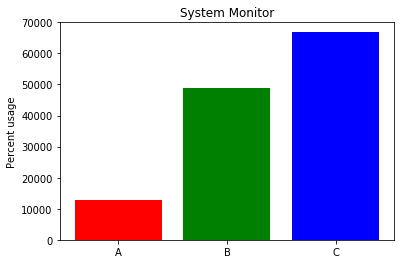

In [62]:
import matplotlib.pyplot as plt

plt.show(block=False)

fig, ax = plt.subplots()
ind = np.arange(1, 4)

pm, pc, pn = plt.bar(ind, 1000)

pm.set_facecolor('r')
pc.set_facecolor('g')
pn.set_facecolor('b')

a = cliente_final[ cliente_final['perfil']  == 'a' ]
b = cliente_final[ cliente_final['perfil']  == 'b' ]
c = cliente_final[ cliente_final['perfil']  == 'c' ]

pm.set_height( len(a) )
pc.set_height( len(b) )
pn.set_height( len(c) )

ax.set_xticks(ind)
ax.set_xticklabels(['A', 'B', 'C'])
ax.set_ylim([0, 70000])

ax.set_ylabel('Percent usage')
ax.set_title('System Monitor')